# EXPLORING AND PROCESSING JOB POSITIONS

In [47]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.preprocessing import MinMaxScaler
import re 

## 1. Data Exploration 

### 1.1 Data loading and basic information

In [ ]:
# Replace 'job_positions.csv' with the actual path to your CSV file
file_path = 'data\job\postings.csv'
job_positions = pd.read_csv(file_path)

In [18]:
job_positions.shape

(123849, 32)

In [4]:
job_positions.head()

,job_id,company_name,title,description,max_salary,pay_period,location,company_id,views,med_salary,...,skills_desc,listed_time,posting_domain,sponsored,work_type,currency,compensation_type,normalized_salary,zip_code,fips
0,921716,Corcoran Sawyer Smith,Marketing Coordinator,Job descriptionA leading real estate firm in N...,20.0,HOURLY,"Princeton, NJ",2774458.0,20.0,NaN,...,Requirements: \n\nWe are seeking a College or ...,1.713398e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,38480.0,8540.0,34021.0
1,1829192,NaN,Mental Health Therapist/Counselor,"At Aspen Therapy and Wellness , we are committ...",50.0,HOURLY,"Fort Collins, CO",NaN,1.0,NaN,...,NaN,1.712858e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,83200.0,80521.0,8069.0
2,10998357,The National Exemplar,Assitant Restaurant Manager,The National Exemplar is accepting application...,65000.0,YEARLY,"Cincinnati, OH",64896719.0,8.0,NaN,...,We are currently accepting resumes for FOH - A...,1.713278e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,55000.0,45202.0,39061.0
3,23221523,"Abrams Fensterman, LLP",Senior Elder Law / Trusts and Estates Associat...,Senior Associate Attorney - Elder Law / Trusts...,175000.0,YEARLY,"New Hyde Park, NY",766262.0,16.0,NaN,...,This position requires a baseline understandin...,1.712896e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,157500.0,11040.0,36059.0
4,35982263,NaN,Service Technician,Looking for HVAC service tech with experience ...,80000.0,YEARLY,"Burlington, IA",NaN,3.0,NaN,...,NaN,1.713452e+12,NaN,0,FULL_TIME,USD,BASE_SALARY,70000.0,52601.0,19057.0


In [5]:
# Check column names and data types
print(job_positions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123849 entries, 0 to 123848
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   job_id                      123849 non-null  int64  
 1   company_name                122130 non-null  object 
 2   title                       123849 non-null  object 
 3   description                 123842 non-null  object 
 4   max_salary                  29793 non-null   float64
 5   pay_period                  36073 non-null   object 
 6   location                    123849 non-null  object 
 7   company_id                  122132 non-null  float64
 8   views                       122160 non-null  float64
 9   med_salary                  6280 non-null    float64
 10  min_salary                  29793 non-null   float64
 11  formatted_work_type         123849 non-null  object 
 12  applies                     23320 non-null   float64
 13  original_liste

In [6]:
# Display a summary of the dataset
print(job_positions.describe(include='all'))

              job_id                                    company_name  \
count   1.238490e+05                                          122130   
unique           NaN                                           24428   
top              NaN  Liberty Healthcare and Rehabilitation Services   
freq             NaN                                            1108   
mean    3.896402e+09                                             NaN   
std     8.404355e+07                                             NaN   
min     9.217160e+05                                             NaN   
25%     3.894587e+09                                             NaN   
50%     3.901998e+09                                             NaN   
75%     3.904707e+09                                             NaN   
max     3.906267e+09                                             NaN   

                title                                        description  \
count          123849                                      

In [10]:
# Check for missing values
missing_values = job_positions.isnull().sum()

# Display columns with missing values
print("Missing Values:")
print(missing_values[missing_values > 0])

Missing Values:
company_name                    1719
description                        7
max_salary                     94056
pay_period                     87776
company_id                      1717
views                           1689
med_salary                    117569
min_salary                     94056
applies                       100529
remote_allowed                108603
application_url                36665
closed_time                   122776
formatted_experience_level     29409
skills_desc                   121410
posting_domain                 39968
currency                       87776
compensation_type              87776
normalized_salary              87776
zip_code                       20872
fips                           27415
dtype: int64


In [11]:
# Display summary statistics for numeric columns
print("Summary Statistics for Numeric Columns:")
print(job_positions.describe())

Summary Statistics for Numeric Columns:
             job_id    max_salary    company_id          views     med_salary  \
count  1.238490e+05  2.979300e+04  1.221320e+05  122160.000000    6280.000000   
mean   3.896402e+09  9.193942e+04  1.220401e+07      14.618247   22015.619876   
std    8.404355e+07  7.011101e+05  2.554143e+07      85.903598   52255.873846   
min    9.217160e+05  1.000000e+00  1.009000e+03       1.000000       0.000000   
25%    3.894587e+09  4.828000e+01  1.435200e+04       3.000000      18.940000   
50%    3.901998e+09  8.000000e+04  2.269650e+05       4.000000      25.500000   
75%    3.904707e+09  1.400000e+05  8.047188e+06       8.000000    2510.500000   
max    3.906267e+09  1.200000e+08  1.034730e+08    9975.000000  750000.000000   

         min_salary       applies  original_listed_time  remote_allowed  \
count  2.979300e+04  23320.000000          1.238490e+05         15246.0   
mean   6.491085e+04     10.591981          1.713152e+12             1.0   
std  

### 1.2 Show an example of job post 

In [7]:
import pandas as pd

def get_job_post(df, job_id=None):
    """
    Extracts and formats a single job post from the dataset.
    
    Parameters:
    - file_path (str): Path to the CSV file.
    - job_id (int, optional): Job ID to extract. If None, a random job post is returned.
    
    Returns:
    - dict: A formatted job post example.
    """        
    # Check if a specific job ID is provided
    if job_id:
        job_post = df[df['job_id'] == job_id]
        if job_post.empty:
            return f"No job found with ID {job_id}"
    else:
        # Select a random job post
        job_post = df.sample(1)
        
    # Extract relevant fields
    job_data = job_post.iloc[0]
    formatted_post = {
        "Job ID": job_data.get('job_id', 'N/A'),
        "Title": job_data.get('title', 'N/A'),
        "Company": job_data.get('company_name', 'N/A'),
        "Location": job_data.get('location', 'N/A'),
        "Description": job_data.get('description', 'N/A'),
        "Max Salary": job_data.get('max_salary', 'N/A'),
        "Min Salary": job_data.get('min_salary', 'N/A'),
        "Pay Period": job_data.get('pay_period', 'N/A'),
        "Skills": job_data.get('skills_desc', 'N/A'),
        "Work Type": job_data.get('work_type', 'N/A'),
    }
        
    return formatted_post

# Example Usage
job_post_example = get_job_post(job_positions, job_id=None)  # Use None for a random job post
print(job_post_example)

{'Job ID': 3900092741, 'Title': 'REMOTE Senior Tax Manager', 'Company': 'CyberCoders', 'Location': 'Phoenix, AZ', 'Description': "We are a public accounting firm with national and international clients, working with both small, early-stage businesspersons to large, global organizations. Our experts are highly experienced in financial advising, tax, accounting and business strategies to provide solutions. We are looking for a Senior Tax Manager (Remote or Hybrid) to help our team as we grow!\n\nWhat You Will Be Doing\n\n Perform tax reviews for Partnership, S-Corp, and C-Corp tax returns Assume responsibility for tax returns and delegates to the various tax preparers as deemed necessary. Participate actively in client meetings and tax planning efforts Communicate effectively with clients and meet critical deadlines Participate in firm's practice development efforts\n\nWhat You Need for this Position\n\nAt Least 7 Years Of Experience With:\n\n Tax in Public Accounting CPA Required CCH Pr

### 1.3 Explore text based features 

In [13]:
# Check unique values and example rows for text columns
text_columns = ['title', 'description', 'skills_desc']  # Replace with your actual text columns
for col in text_columns:
    print(f"Column: {col}")
    print(f"Number of unique values: {job_positions[col].nunique()}")
    print(f"Sample values:\n{job_positions[col].dropna().sample(5)}")
    print("\n")

Column: title
Number of unique values: 72521
Sample values:
103538    Sleep Tech Certified - Huber Heights - Sleep C...
1936                                    Legislative Analyst
29438                                 Entry Level Recruiter
74233                                Senior Program Manager
57441                                Retail Sales Associate
Name: title, dtype: object


Column: description
Number of unique values: 107827
Sample values:
116083    If you are passionate about pushing the bounda...
70080     Job Title: Master Data Coordinator (Entry) Loc...
60790     At PEARCE, we've got a career for you.\n\nJoin...
5954      We are looking for high level candidates who w...
95542     About Our Company:We are a well-established, l...
Name: description, dtype: object


Column: skills_desc
Number of unique values: 2212
Sample values:
30219                               Oracle DBA , PostgreSQL
118536                \n\n\n\nPI42963ba755dd-29463-33818914
112605    This position 

### 1.4 Focus on the "skill desc" column

In [16]:
# Explore the skills_desc column
col = 'skills_desc'  # Replace with your actual text column

# Number of unique values
unique_skills = job_positions[col].nunique()
print(f"Column: {col}")
print(f"Number of unique values: {unique_skills}")

# Display some sample non-null values
print(f"Sample non-null values:\n{job_positions[col].dropna().sample(5)}\n")

# Length of each skills description (useful for summarization and visualization later)
job_positions['skills_length'] = job_positions[col].dropna().apply(len)
print(f"Descriptive statistics for skills length:\n{job_positions['skills_length'].describe()}\n")


Column: skills_desc
Number of unique values: 2212
Sample non-null values:
47548                                   REST , LDAP , SOAP
79620    Housekeeping, Janitorial Services, Cleaning Ch...
87600                \n\n\n\nPI9e2b6362bd11-29463-34276595
12809    This position requires the following skills: A...
37447                \n\n\n\nPI703aa30cb921-29463-31764347
Name: skills_desc, dtype: object

Descriptive statistics for skills length:
count    2439.000000
mean      204.898729
std       545.914274
min         3.000000
25%        33.000000
50%        33.000000
75%       103.000000
max      3602.000000
Name: skills_length, dtype: float64



C:\Users\39392\AppData\Local\Temp\ipykernel_6740\1852945016.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['word_count'] = filtered_data[col].apply(lambda x: len(str(x).split()))


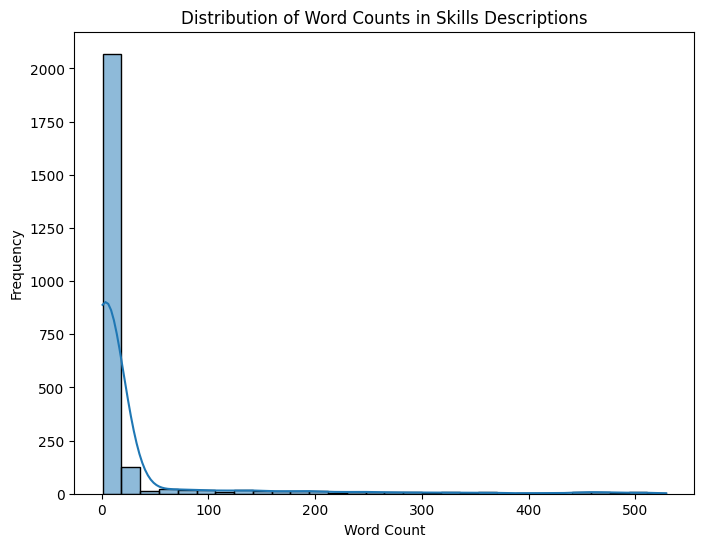

In [ ]:
# Filter rows with non-null skill descriptions
filtered_data = job_positions[job_positions[col].notnull()]

# Word count for each description
filtered_data['word_count'] = filtered_data[col].apply(lambda x: len(str(x).split()))

# Plot distribution of word counts
plt.figure(figsize=(8, 6))
sns.histplot(filtered_data['word_count'], bins=30, kde=True)
plt.title("Distribution of Word Counts in Skills Descriptions")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.show()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\39392\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\39392\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\39392\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\39392\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.
C:\Users\39392\AppData\Local\Temp\ipykernel_6740\2201921231.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['proce

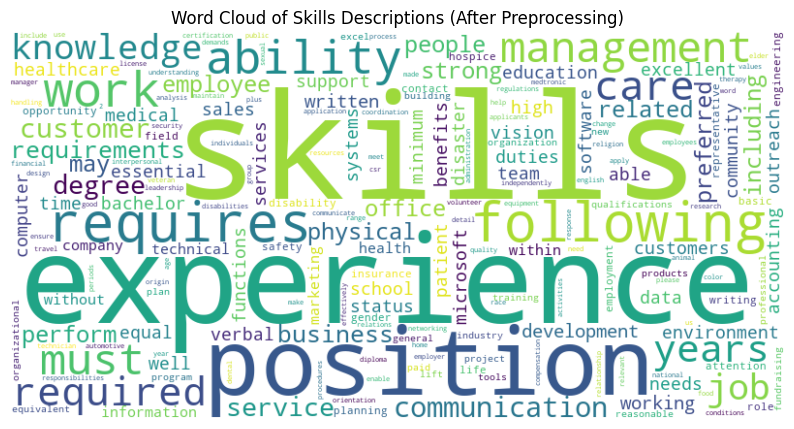

Top 10 most common words in skills_desc (After Preprocessing):
skills: 835
experience: 569
position: 523
following: 477
requires: 471
work: 366
ability: 343
must: 293
management: 277
care: 267


In [26]:
# Download NLTK stopwords (if not already done)
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

# Preprocess and tokenize
stop_words = set(stopwords.words('english'))  # Define stopwords
filtered_data['processed_skills'] = filtered_data[col].dropna().apply(
    lambda x: ' '.join(
        word.lower() for word in word_tokenize(str(x)) 
        if word.isalnum() and word.lower() not in stop_words
    )
)

# Combine all processed words into a single string
all_words_processed = ' '.join(filtered_data['processed_skills'].dropna()).split()

# Count frequencies
word_counts_processed = Counter(all_words_processed)

# Generate word cloud
wordcloud_processed = WordCloud(
    width=800, height=400, background_color='white'
).generate_from_frequencies(word_counts_processed)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_processed, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Skills Descriptions (After Preprocessing)")
plt.show()

# Display top 10 most common words
top_words_processed = word_counts_processed.most_common(10)
print("Top 10 most common words in skills_desc (After Preprocessing):")
for word, count in top_words_processed:
    print(f"{word}: {count}")

In [44]:
# process the data and get only meaningfull keywords from skill decription (spacy library)

### 1.5 Distributiuon of numeric features

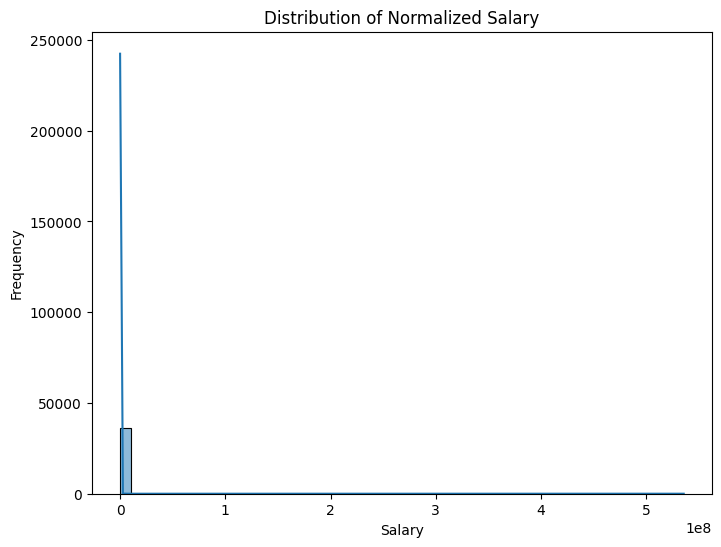

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot a histogram for normalized_salary
plt.figure(figsize=(8, 6))
sns.histplot(job_positions['normalized_salary'], bins=50, kde=True)
plt.title("Distribution of Normalized Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.show()

## 2. Data Cleaning 

### 2.1 Clean text function

In [48]:
# Function to clean text
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove digits
    text = re.sub(r'\d+', '', text)
    # Remove stopwords
    stop_words = set(stopwords.words('english'))
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

### 2.2 Extract text columns and apply clean text function 

In [51]:
# extract text columns
text_columns = [#'title',
                'description', 
                #'skills_desc'
                ]  # Replace with your actual text columns
for cokl in text_columns:
    job_positions[col] = job_positions[col].apply(clean_text)

AttributeError: 'float' object has no attribute 'lower'

### 2.3 Normalize numerical features 

In [ ]:
# Initialize the scaler
scaler = MinMaxScaler()

# Normalize the specified columns
job_positions[['max_salary', 'normalized_salary']] = scaler.fit_transform(job_positions[['max_salary', 'normalized_salary']])

## 3. Features Engineering 

### 3.1 Job description parsing 

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Example for vectorizing the 'description' column
tfidf_vectorizer_desc = TfidfVectorizer(max_features=1000, stop_words='english')

# Fit and transform the 'description' column
tfidf_matrix_desc = tfidf_vectorizer_desc.fit_transform(job_positions['description'])

# Convert to DataFrame and concatenate with the original DataFrame
tfidf_df_desc = pd.DataFrame(tfidf_matrix_desc.toarray(), columns=tfidf_vectorizer_desc.get_feature_names_out())
df = pd.concat([job_positions.reset_index(drop=True), tfidf_df_desc.reset_index(drop=True)], axis=1) 

### 3.2 Reapeat for skill description

In [ ]:
# Example for vectorizing the 'skills_desc' column
tfidf_vectorizer_skills = TfidfVectorizer(max_features=500, stop_words='english')

# Fit and transform the 'skills_desc' column
tfidf_matrix_skills = tfidf_vectorizer_skills.fit_transform(df['skills_desc'])

# Convert to DataFrame and concatenate with the original DataFrame
tfidf_df_skills = pd.DataFrame(tfidf_matrix_skills.toarray(), columns=tfidf_vectorizer_skills.get_feature_names_out())
df = pd.concat([df.reset_index(drop=True), tfidf_df_skills.reset_index(drop=True)], axis=1)

### 3.3 Extract skill from the description 

In [ ]:
import spacy

# Load the English language model from spaCy
nlp = spacy.load("en_core_web_sm")

def extract_skills(text):
    doc = nlp(text)
    skills = [token.text for token in doc if token.pos_ == 'NOUN' and token.is_alpha]  # Adjust POS tags as needed
    return ' '.join(skills)

# Apply the function to the 'description' column
df['extracted_skills'] = df['description'].apply(extract_skills)

## 4. Matching Preparation 